In [1]:
import polars as pl
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates

## Check if sleep data is normally distributed
We want to see if the deep / rem sleep durations are normally distributed.

In [2]:
df = pl.read_csv("../data/processed/cleaned_normal_data_experiment.csv", try_parse_dates=True)
df = df.with_columns(
    # REM sleep percentage
    (pl.col("asleep_rem_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("rem_sleep_percentage"),

    # Deep sleep percentage
    (pl.col("asleep_deep_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("deep_sleep_percentage"),

    # Core sleep percentage
    (pl.col("asleep_core_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("core_sleep_percentage"),

    # Awake percentage (awake time relative to total sleep period)
    (pl.col("awake_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("awake_percentage"),
).filter(
    ~((pl.col("rem_sleep_percentage") == 0) | (pl.col("deep_sleep_percentage") == 0))
)
df

sleep_day,awake_duration_mins,asleep_unspecified_duration_mins,asleep_core_duration_mins,asleep_rem_duration_mins,asleep_deep_duration_mins,total_sleep_duration_mins,total_time_in_bed_mins,sleep_period_start,sleep_period_end,rem_sleep_percentage,deep_sleep_percentage,core_sleep_percentage,awake_percentage
date,f64,f64,f64,f64,f64,f64,f64,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,f64
2022-09-15,2.5,0.0,215.0,109.0,56.5,380.5,383.0,2022-09-14 23:37:37 UTC,2022-09-15 05:32:07 UTC,28.65,14.85,56.5,0.66
2022-09-16,2.5,0.0,269.5,111.0,81.0,461.5,464.0,2022-09-15 22:17:02 UTC,2022-09-16 05:58:02 UTC,24.05,17.55,58.4,0.54
2022-09-17,18.5,0.0,232.5,105.5,94.0,432.0,450.5,2022-09-16 22:30:17 UTC,2022-09-17 05:59:17 UTC,24.42,21.76,53.82,4.28
2022-09-18,15.0,0.0,265.5,127.5,51.5,444.5,459.5,2022-09-17 22:52:32 UTC,2022-09-18 06:30:32 UTC,28.68,11.59,59.73,3.37
2022-09-19,7.0,0.0,229.5,79.0,62.0,370.5,377.5,2022-09-18 23:13:29 UTC,2022-09-19 05:17:59 UTC,21.32,16.73,61.94,1.89
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-05-04,9.5,62.0,239.5,87.5,67.0,456.0,465.5,2025-05-04 00:09:10 UTC,2025-05-04 07:53:24 UTC,19.19,14.69,52.52,2.08
2025-05-05,66.0,65.0,256.0,30.5,41.5,393.0,459.0,2025-05-04 23:28:01 UTC,2025-05-05 07:12:53 UTC,7.76,10.56,65.14,16.79
2025-05-06,50.0,0.0,274.0,82.5,88.5,445.0,495.0,2025-05-05 21:07:03 UTC,2025-05-06 05:21:03 UTC,18.54,19.89,61.57,11.24


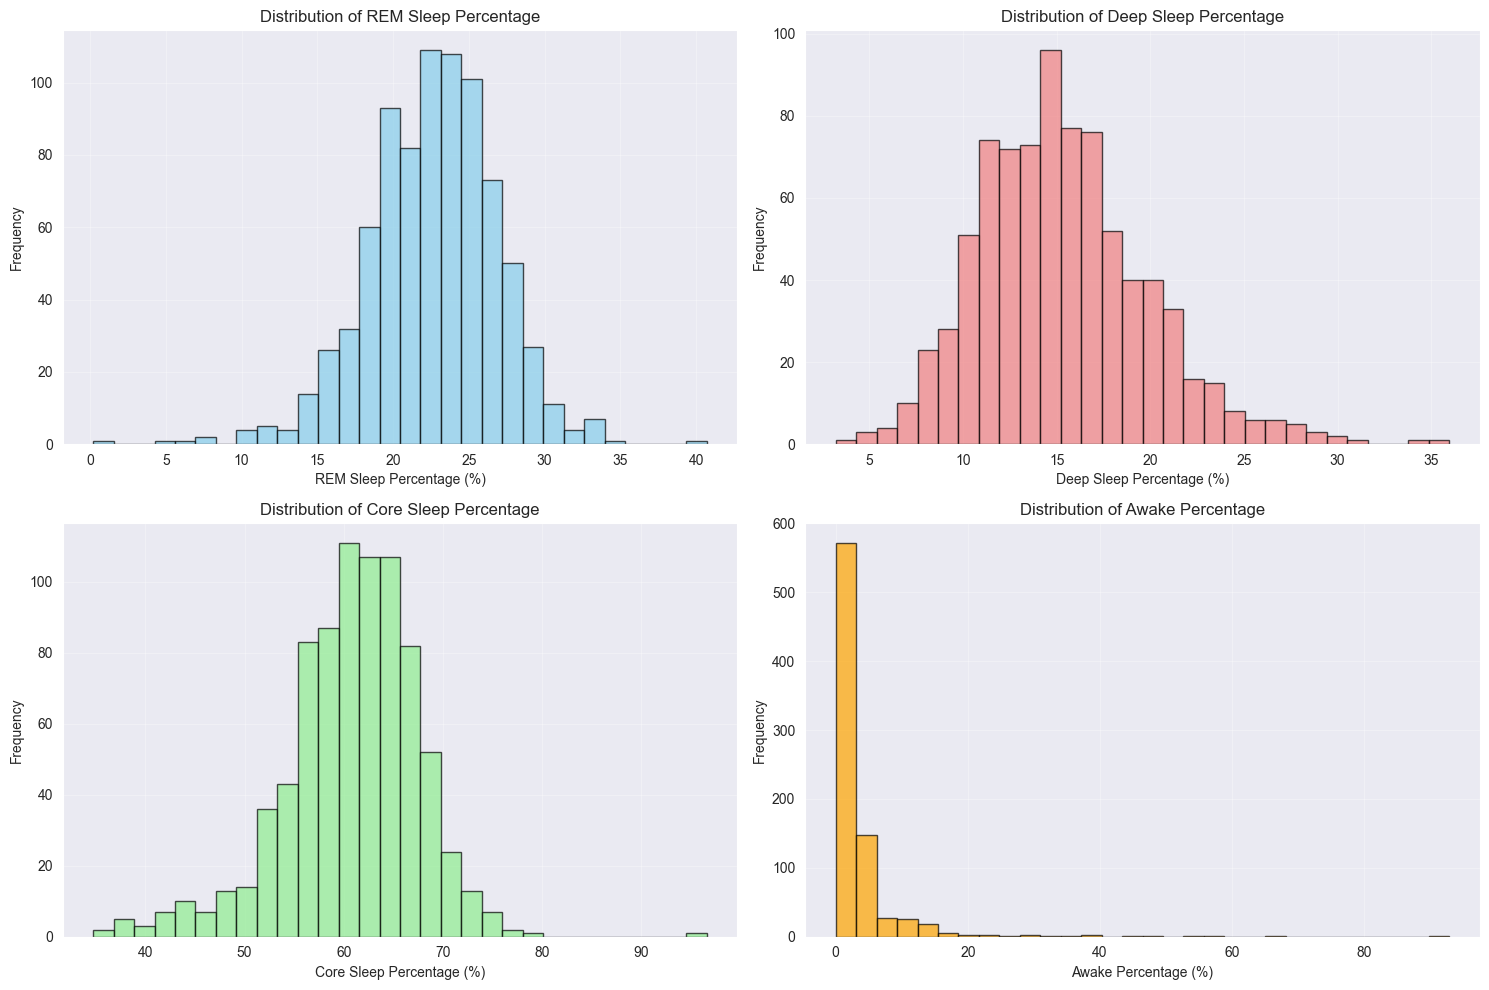

In [3]:
rem_percentages = df['rem_sleep_percentage'].to_numpy()
deep_percentages = df['deep_sleep_percentage'].to_numpy()
core_percentages = df['core_sleep_percentage'].to_numpy()
awake_percentages = df['awake_percentage'].to_numpy()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# REM sleep histogram
ax1.hist(rem_percentages, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('REM Sleep Percentage (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of REM Sleep Percentage')
ax1.grid(True, alpha=0.3)

# Deep sleep histogram
ax2.hist(deep_percentages, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Deep Sleep Percentage (%)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Deep Sleep Percentage')
ax2.grid(True, alpha=0.3)

# Core sleep histogram
ax3.hist(core_percentages, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_xlabel('Core Sleep Percentage (%)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Core Sleep Percentage')
ax3.grid(True, alpha=0.3)

# Awake percentage histogram
ax4.hist(awake_percentages, bins=30, alpha=0.7, color='orange', edgecolor='black')
ax4.set_xlabel('Awake Percentage (%)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Awake Percentage')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../figures/normality/histograms_all_sleep_stages.png", dpi=300, bbox_inches='tight')
plt.show()

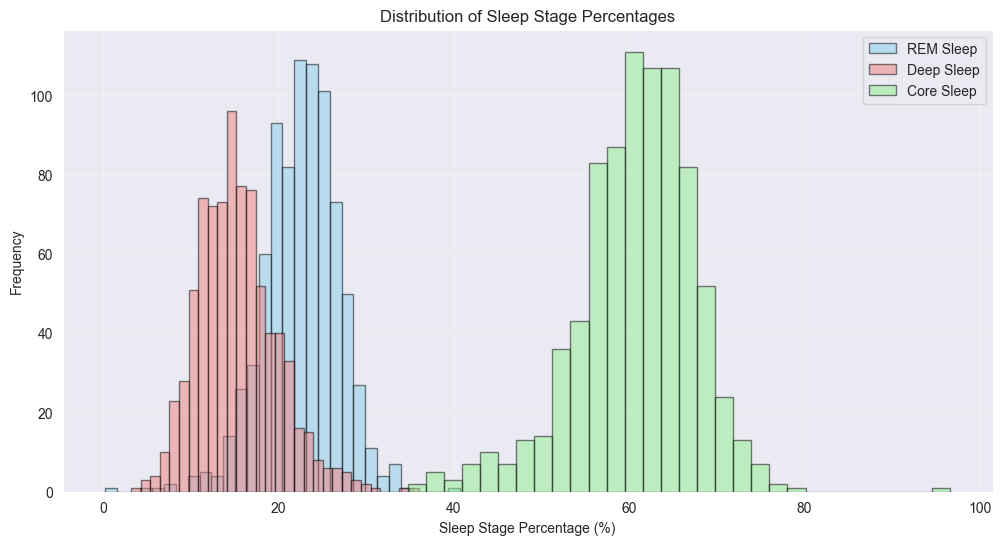

In [4]:
plt.figure(figsize=(12, 6))

# Plot only the three sleep stages on same axes (excluding awake)
plt.hist(rem_percentages, bins=30, alpha=0.5, label='REM Sleep',
         color='skyblue', edgecolor='black')
plt.hist(deep_percentages, bins=30, alpha=0.5, label='Deep Sleep',
         color='lightcoral', edgecolor='black')
plt.hist(core_percentages, bins=30, alpha=0.5, label='Core Sleep',
         color='lightgreen', edgecolor='black')

plt.xlabel('Sleep Stage Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Stage Percentages')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../figures/normality/histogram_sleep_stages_combined.png", dpi=300, bbox_inches='tight')
plt.show()

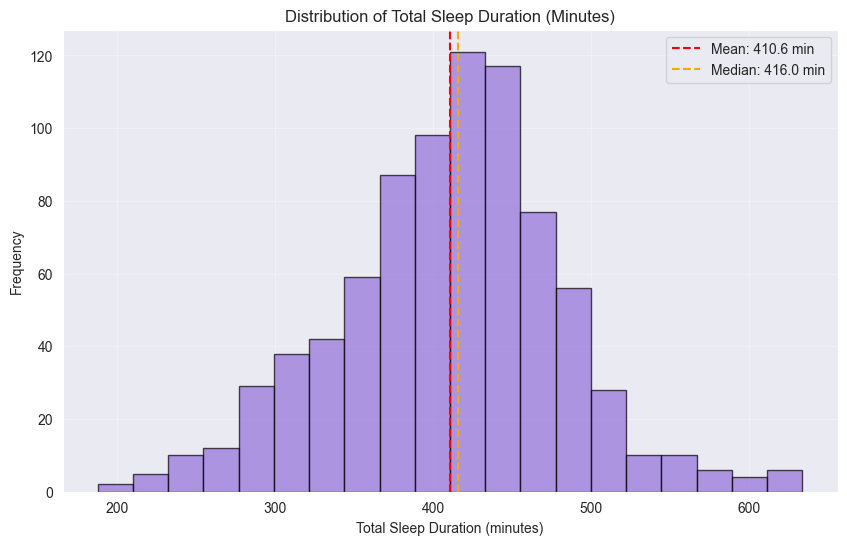

In [5]:
total_sleep_durations = df['total_sleep_duration_mins'].to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(total_sleep_durations, bins=20, alpha=0.7, color='mediumpurple', edgecolor='black')
plt.xlabel('Total Sleep Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sleep Duration (Minutes)')
plt.grid(True, alpha=0.3)

# Add some statistics to the plot
mean_duration = np.mean(total_sleep_durations)
median_duration = np.median(total_sleep_durations)
std_duration = np.std(total_sleep_durations)

plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.1f} min')
plt.axvline(median_duration, color='orange', linestyle='--', label=f'Median: {median_duration:.1f} min')
plt.legend()

plt.savefig("../figures/normality/histogram_total_sleep_duration.png", dpi=300, bbox_inches='tight')
plt.show()

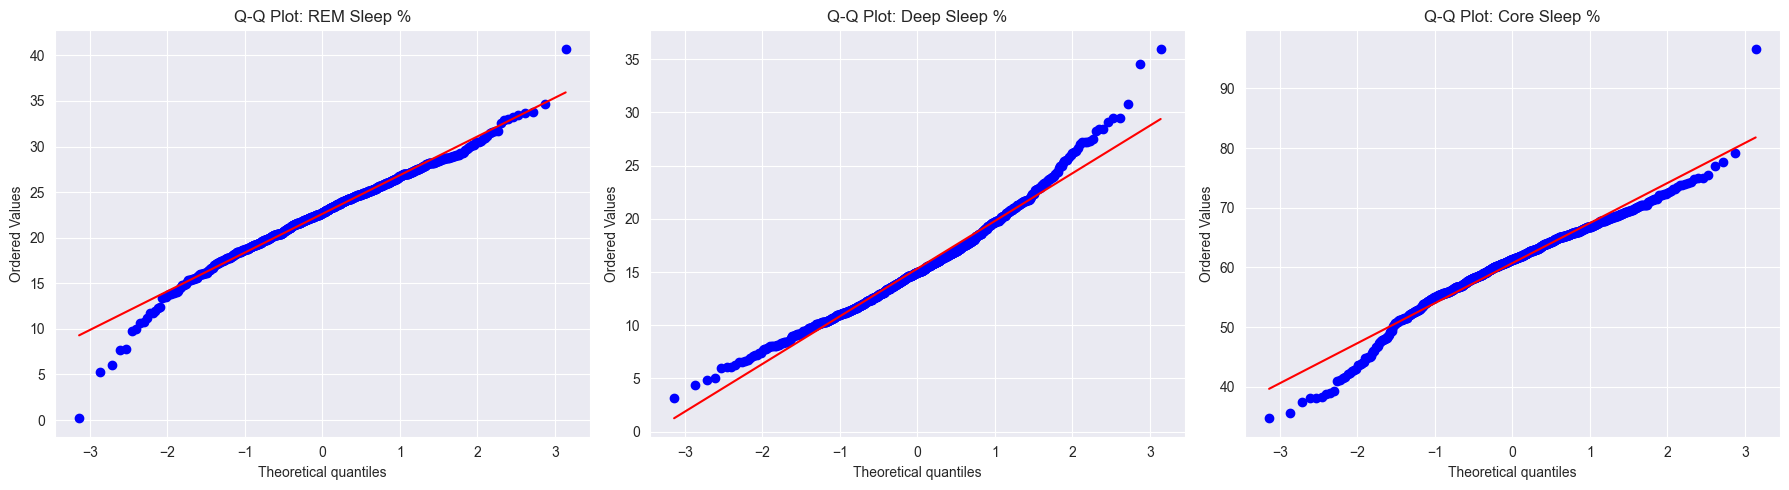

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# REM sleep Q-Q plot
stats.probplot(rem_percentages, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot: REM Sleep %")

# Deep sleep Q-Q plot
stats.probplot(deep_percentages, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot: Deep Sleep %")

# Core sleep Q-Q plot
stats.probplot(core_percentages, dist="norm", plot=ax3)
ax3.set_title("Q-Q Plot: Core Sleep %")

plt.tight_layout()
plt.savefig("../figures/normality/qq_plots_sleep_stages.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
def test_normality_dagostino_typst(data, name):
    # Remove NaN values
    clean_data = data[~np.isnan(data)]

    if len(clean_data) > 0:
        statistic, p_value = stats.normaltest(clean_data)
        result = 'Normal' if p_value > 0.05 else 'Non-normal'

        return {
            'variable': name.replace('_', ' ').title(),
            'n': len(clean_data),
            'statistic': f"{statistic:.4f}",
            'p_value': f"{p_value:.6f}" if p_value >= 0.000001 else "< 0.000001",
            'result': result
        }
    else:
        return {
            'variable': name.replace('_', ' ').title(),
            'n': 0,
            'statistic': 'N/A',
            'p_value': 'N/A',
            'result': 'No data'
        }

def create_dagostino_typst_table(results):
    """Create a typst formatted table for D'Agostino-Pearson normality test results"""

    # Start the table with header
    typst_table = """#table(
  columns: (auto, auto, auto, auto, auto),
  inset: 8pt,
  align: center + horizon,
  stroke: 0.5pt,
  table.header(
    [*Variable*], [*N*], [*Test Value*], [*P-value*], [*Result*]
  ),"""

    # Add data rows
    for result in results:
        typst_table += f"""
  [{result['variable']}], [{result['n']}], [{result['statistic']}], [{result['p_value']}], [{result['result']}],"""

    # Close the table
    typst_table += "\n)"

    return typst_table

In [8]:
# Perform D'Agostino-Pearson normality tests (excluding awake percentage)
results = []
results.append(test_normality_dagostino_typst(rem_percentages, "rem_sleep_percentage"))
results.append(test_normality_dagostino_typst(deep_percentages, "deep_sleep_percentage"))
results.append(test_normality_dagostino_typst(core_percentages, "core_sleep_percentage"))

# Create and display the typst formatted table
typst_table = create_dagostino_typst_table(results)
print(typst_table)

#table(
  columns: (auto, auto, auto, auto, auto),
  inset: 8pt,
  align: center + horizon,
  stroke: 0.5pt,
  table.header(
    [*Variable*], [*N*], [*Test Value*], [*P-value*], [*Result*]
  ),
  [Rem Sleep Percentage], [817], [59.3931], [< 0.000001], [Non-normal],
  [Deep Sleep Percentage], [817], [65.8686], [< 0.000001], [Non-normal],
  [Core Sleep Percentage], [817], [72.4396], [< 0.000001], [Non-normal],
)
